## Load the data

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


## Explore the data

### Subtask:
Analyze the dataset to understand its structure, features, and potential issues (e.g., missing values, data types, distributions).


In [4]:
import numpy as np

# 1. Calculate the percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:")
display(missing_percentages)

# 2. Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# 3. Examine unique values and their counts for the 'id' column
print("\nUnique values and counts for 'id' column:")
display(df['id'].value_counts())

Percentage of Missing Values:


,0
id,0.000000
date,0.000000
NH4,0.104858
BSK5,0.034953
Suspended,0.559245
O2,0.104858
NO3,0.034953
NO2,0.104858
SO4,1.712688
PO4,0.978679



Descriptive Statistics:


,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
std,6.084226,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000



Unique values and counts for 'id' column:


,count
id,
3,262
14,259
15,258
22,256
16,253
10,252
13,149
12,148
4,91



DataFrame with new date features:


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day,dayofweek
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2,17,3
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5,11,3
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9,11,0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12,13,2
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3,2,4


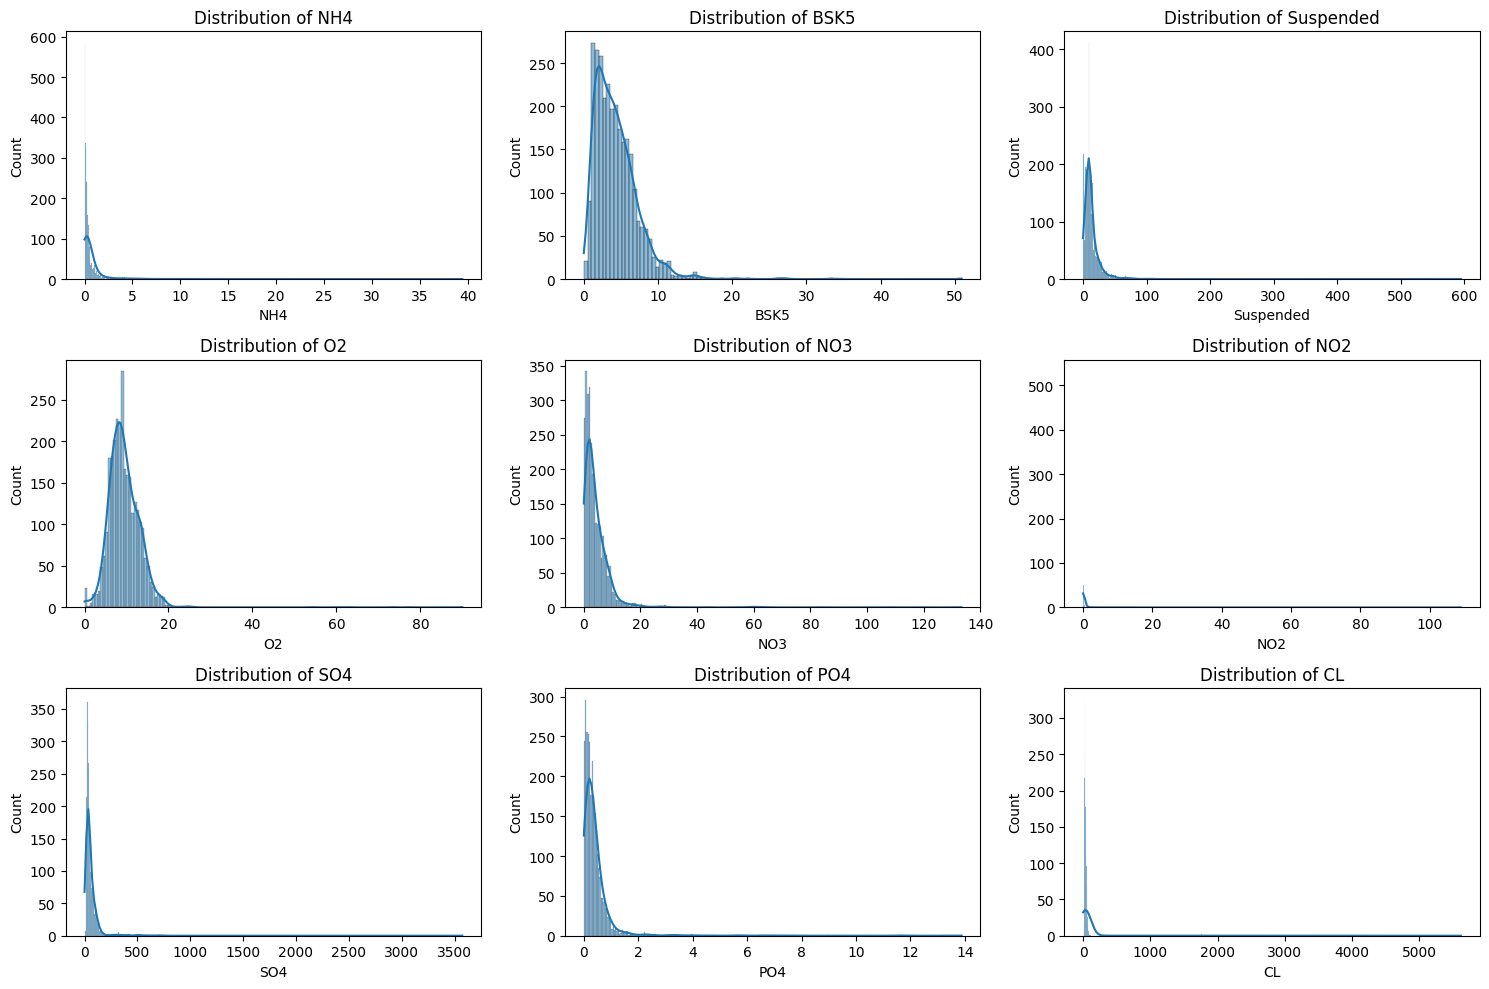

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Convert the 'date' column to datetime objects and extract time-based features
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

print("\nDataFrame with new date features:")
display(df.head())

# 5. Visualize the distribution of key numerical features
numerical_features = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

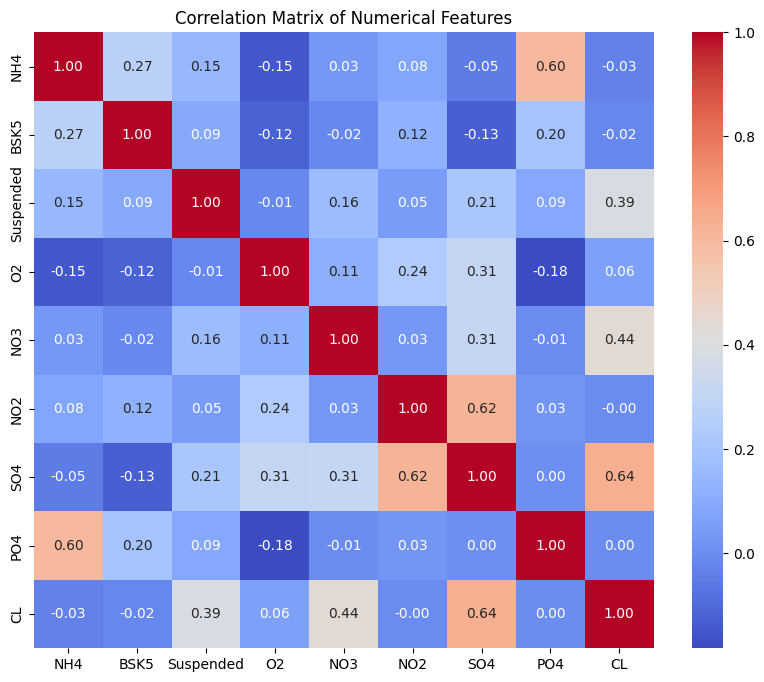

In [6]:
# 6. Investigate potential correlations between numerical features
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Clean the data

### Subtask:
Handle missing values, outliers, and inconsistencies in the data.


Percentage of Missing Values after imputation:


,0
id,0.0
date,0.0
NH4,0.0
BSK5,0.0
Suspended,0.0
O2,0.0
NO3,0.0
NO2,0.0
SO4,0.0
PO4,0.0



Descriptive Statistics after outlier handling:


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,day,dayofweek
count,2861.000000,2861,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,12.397064,2010-05-02 22:53:33.701502976,0.359952,4.231869,11.420580,9.381746,3.779079,0.093269,49.628751,0.337821,38.198925,2009.843411,6.540370,12.340091,1.703251
min,1.000000,2000-01-10 00:00:00,0.000000,0.000000,0.000000,0.470000,0.000000,0.000000,0.000000,0.000000,0.020000,2000.000000,1.000000,1.000000,0.000000
25%,8.000000,2005-03-10 00:00:00,0.080000,2.160000,6.000000,7.100000,1.390000,0.030000,27.200000,0.130000,26.800000,2005.000000,4.000000,6.000000,1.000000
50%,14.000000,2010-06-04 00:00:00,0.220000,3.800000,10.000000,9.000000,2.800000,0.059000,38.100000,0.278000,34.100000,2010.000000,7.000000,12.000000,2.000000
75%,16.000000,2015-08-11 00:00:00,0.500000,5.800000,14.800000,11.520000,5.580000,0.129000,63.700000,0.468000,46.330000,2015.000000,9.000000,17.000000,2.000000
max,22.000000,2021-04-07 00:00:00,1.130000,11.260000,28.000000,18.150000,11.865000,0.277500,118.450000,0.975000,75.625000,2021.000000,12.000000,31.000000,6.000000
std,6.084226,NaN,0.368830,2.543157,7.591215,3.363819,3.114273,0.086369,30.239748,0.265720,15.300043,6.022041,3.344685,7.233471,1.174177


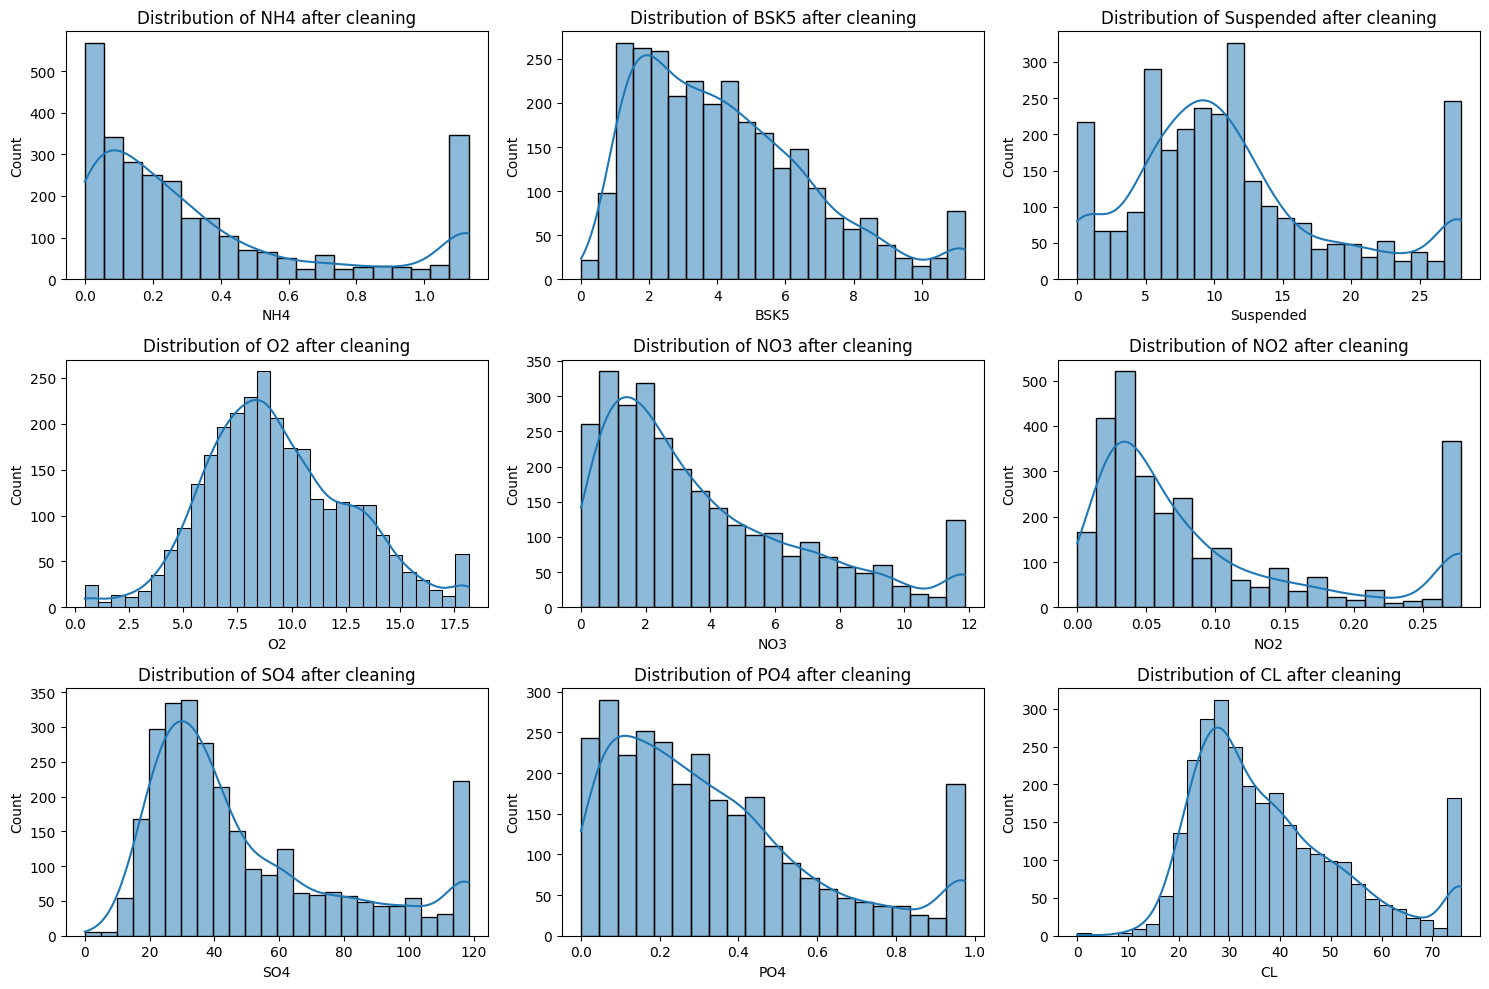

In [7]:
# 1. Address missing values by imputing with the mean
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

print("Percentage of Missing Values after imputation:")
display((df.isnull().sum() / len(df)) * 100)

# 2. Identify and handle outliers using the IQR method
# Define a function to detect and handle outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Option: Capping outliers (replace outliers with the bounds)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply outlier handling to numerical features
for col in numerical_features:
    df = handle_outliers_iqr(df, col)

print("\nDescriptive Statistics after outlier handling:")
display(df.describe())

# 3. Check for and resolve any data inconsistencies or errors
# Based on the previous exploration, no obvious inconsistencies were noted beyond missing values and outliers.
# However, a basic check of data ranges against plausible values can be done if domain knowledge is available.
# For this dataset, we will rely on the outlier handling to address values that are statistically extreme.
# A visual check of distributions after handling can also reveal inconsistencies.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after cleaning')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Create new features from existing ones that might improve the model's performance. This could involve combining features, creating polynomial features, or applying transformations.


In [8]:
# 1. Calculate interaction terms
# Based on the correlation matrix and potential real-world interactions:
# NH4 and O2 (Ammonia and Oxygen levels are often inversely related in water)
# NO3 and NO2 (Different forms of nitrogen, can be related)
# PO4 and NH4 (Both nutrients, can co-occur)
df['NH4_O2_interaction'] = df['NH4'] * df['O2']
df['NO3_NO2_interaction'] = df['NO3'] * df['NO2']
df['PO4_NH4_interaction'] = df['PO4'] * df['NH4']
df['SO4_CL_interaction'] = df['SO4'] * df['CL'] # High correlation

# 2. Create polynomial features (degree 2) for key numerical features
# Choose features that might have non-linear relationships or showed non-linear distributions
polynomial_features = ['NH4', 'BSK5', 'Suspended', 'O2', 'PO4']
for col in polynomial_features:
    df[f'{col}_squared'] = df[col]**2

# 3. Temporal features were already created in the exploration phase (year, month, day, dayofweek)

# Display the head of the DataFrame to show the newly created features
display(df.head())

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,...,dayofweek,NH4_O2_interaction,NO3_NO2_interaction,PO4_NH4_interaction,SO4_CL_interaction,NH4_squared,BSK5_squared,Suspended_squared,O2_squared,PO4_squared
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.500,0.057,118.45,0.454,...,3,4.05900,0.541500,0.14982,8957.78125,0.108900,7.6729,144.00,151.2900,0.206116
1,1,2000-05-11,0.044,3.00,28.0,14.61,11.865,0.034,118.45,0.090,...,3,0.64284,0.403410,0.00396,8957.78125,0.001936,9.0000,784.00,213.4521,0.008100
2,1,2000-09-11,0.032,2.10,24.5,9.87,11.865,0.173,118.45,0.200,...,0,0.31584,2.052645,0.00640,8957.78125,0.001024,4.4100,600.25,97.4169,0.040000
3,1,2000-12-13,0.170,2.23,28.0,12.40,11.865,0.099,118.45,0.377,...,2,2.10800,1.174635,0.06409,8957.78125,0.028900,4.9729,784.00,153.7600,0.142129
4,1,2001-03-02,0.000,3.03,28.0,14.69,10.000,0.065,118.45,0.134,...,4,0.00000,0.650000,0.00000,8957.78125,0.000000,9.1809,784.00,215.7961,0.017956


## Preprocess the data

### Subtask:
Prepare the data for model training, including scaling numerical features and encoding categorical features.


In [9]:
from sklearn.preprocessing import StandardScaler

# 1. Identify numerical and categorical features
# Exclude 'id' and 'date'
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Remove 'id', 'year', 'month', 'day', 'dayofweek' and the newly created features from the numerical list
features_to_exclude = ['id', 'year', 'month', 'day', 'dayofweek',
                       'NH4_O2_interaction', 'NO3_NO2_interaction', 'PO4_NH4_interaction', 'SO4_CL_interaction',
                       'NH4_squared', 'BSK5_squared', 'Suspended_squared', 'O2_squared', 'PO4_squared']
numerical_features = [col for col in numerical_features if col not in features_to_exclude]

# For this task, we don't have explicit categorical features other than 'id' which we will drop.
# The temporal features (year, month, day, dayofweek) can be treated as categorical or numerical depending on the model.
# For now, we will keep them as numerical after scaling if applicable or handle them separately if needed later.
# Since the instructions specifically mention dropping 'id' and 'date', we will proceed with that.

# 2. Apply standard scaling to the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Handle the 'id' and 'date' columns by dropping them
df = df.drop(['id', 'date'], axis=1)

# 4. Confirm the data types of the remaining columns
print("Data types after preprocessing:")
display(df.info())

display(df.head())

Data types after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NH4                  2861 non-null   float64
 1   BSK5                 2861 non-null   float64
 2   Suspended            2861 non-null   float64
 3   O2                   2861 non-null   float64
 4   NO3                  2861 non-null   float64
 5   NO2                  2861 non-null   float64
 6   SO4                  2861 non-null   float64
 7   PO4                  2861 non-null   float64
 8   CL                   2861 non-null   float64
 9   year                 2861 non-null   int32  
 10  month                2861 non-null   int32  
 11  day                  2861 non-null   int32  
 12  dayofweek            2861 non-null   int32  
 13  NH4_O2_interaction   2861 non-null   float64
 14  NO3_NO2_interaction  2861 non-null   float64
 15  PO4_NH

None

,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,...,dayofweek,NH4_O2_interaction,NO3_NO2_interaction,PO4_NH4_interaction,SO4_CL_interaction,NH4_squared,BSK5_squared,Suspended_squared,O2_squared,PO4_squared
0,-0.081223,-0.574925,0.076341,0.867693,1.837321,-0.420011,2.276252,0.437300,2.446569,2000,...,3,4.05900,0.541500,0.14982,8957.78125,0.108900,7.6729,144.00,151.2900,0.206116
1,-0.856783,-0.484470,2.184409,1.554533,2.596861,-0.686358,2.276252,-0.932805,2.446569,2000,...,3,0.64284,0.403410,0.00396,8957.78125,0.001936,9.0000,784.00,213.4521,0.008100
2,-0.889324,-0.838423,1.723269,0.145174,2.596861,0.923304,2.276252,-0.518762,2.446569,2000,...,0,0.31584,2.052645,0.00640,8957.78125,0.001024,4.4100,600.25,97.4169,0.040000
3,-0.515103,-0.787296,2.184409,0.897427,2.596861,0.066362,2.276252,0.147470,2.446569,2000,...,2,2.10800,1.174635,0.06409,8957.78125,0.028900,4.9729,784.00,153.7600,0.142129
4,-0.976100,-0.472672,2.184409,1.578320,1.997901,-0.327369,2.276252,-0.767188,2.446569,2001,...,4,0.00000,0.650000,0.00000,8957.78125,0.000000,9.1809,784.00,215.7961,0.017956


## Split the data

### Subtask:
Split the dataset into training and testing sets.


In [10]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and features (X)
# Assuming 'PO4' is the target variable for water quality prediction. You might need to change this based on the specific prediction task.
target_variable = 'PO4'
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2288, 21)
Shape of X_test: (573, 21)
Shape of y_train: (2288,)
Shape of y_test: (573,)


## Train the model

### Subtask:
Train a suitable model for water quality prediction.


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

# Train the model using the training data
gbr.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics.


**Reasoning**:
Evaluate the trained model using standard regression metrics.



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0040
R-squared (R2) Score: 1.0000
